> # PACKAGES AND LIBRARIES

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

> # PATH, LABEL, TRANSFORMATION

#### MAIN

In [2]:
Main_WAV_Path = Path("../input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data")

#### WAV PATH

In [3]:
Wav_Path = list(Main_WAV_Path.glob(r"**/*.wav"))

#### WAV LABELS

In [4]:
Wav_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Wav_Path))

#### TO SERIES

In [5]:
Wav_Path_Series = pd.Series(Wav_Path,name="WAV").astype(str)
Wav_Labels_Series = pd.Series(Wav_Labels,name="EMOTION")

#### TO DATAFRAME

In [6]:
Main_Wav_Data = pd.concat([Wav_Path_Series,Wav_Labels_Series],axis=1)

In [7]:
print(Main_Wav_Data.head(-1))

                                                    WAV  \
0     ../input/toronto-emotional-speech-set-tess/TES...   
1     ../input/toronto-emotional-speech-set-tess/TES...   
2     ../input/toronto-emotional-speech-set-tess/TES...   
3     ../input/toronto-emotional-speech-set-tess/TES...   
4     ../input/toronto-emotional-speech-set-tess/TES...   
...                                                 ...   
2794  ../input/toronto-emotional-speech-set-tess/TES...   
2795  ../input/toronto-emotional-speech-set-tess/TES...   
2796  ../input/toronto-emotional-speech-set-tess/TES...   
2797  ../input/toronto-emotional-speech-set-tess/TES...   
2798  ../input/toronto-emotional-speech-set-tess/TES...   

                     EMOTION  
0                   YAF_fear  
1                   YAF_fear  
2                   YAF_fear  
3                   YAF_fear  
4                   YAF_fear  
...                      ...  
2794  YAF_pleasant_surprised  
2795  YAF_pleasant_surprised  
2796  YAF_pl

In [8]:
print(Main_Wav_Data["EMOTION"].value_counts())

OAF_Fear                  200
YAF_angry                 200
YAF_neutral               200
YAF_happy                 200
OAF_neutral               200
YAF_sad                   200
YAF_fear                  200
YAF_disgust               200
OAF_disgust               200
YAF_pleasant_surprised    200
OAF_angry                 200
OAF_Pleasant_surprise     200
OAF_Sad                   200
OAF_happy                 200
Name: EMOTION, dtype: int64


#### TO SHUFFLE

In [9]:
Main_Wav_Data = Main_Wav_Data.sample(frac=1).reset_index(drop=True)

In [10]:
print(Main_Wav_Data.head(-1))

                                                    WAV  \
0     ../input/toronto-emotional-speech-set-tess/TES...   
1     ../input/toronto-emotional-speech-set-tess/TES...   
2     ../input/toronto-emotional-speech-set-tess/TES...   
3     ../input/toronto-emotional-speech-set-tess/TES...   
4     ../input/toronto-emotional-speech-set-tess/TES...   
...                                                 ...   
2794  ../input/toronto-emotional-speech-set-tess/TES...   
2795  ../input/toronto-emotional-speech-set-tess/TES...   
2796  ../input/toronto-emotional-speech-set-tess/TES...   
2797  ../input/toronto-emotional-speech-set-tess/TES...   
2798  ../input/toronto-emotional-speech-set-tess/TES...   

                     EMOTION  
0     YAF_pleasant_surprised  
1                   YAF_fear  
2                  YAF_happy  
3                  YAF_happy  
4                YAF_disgust  
...                      ...  
2794                YAF_fear  
2795             OAF_neutral  
2796        

> # DATA PROCESS FUNCTIONS

#### NOISE

In [11]:
def add_noise(data):
    noise_value = 0.015 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])
    
    return data

#### STRETCH

In [12]:
def stretch_process(data,rate=0.8):
    
    return librosa.effects.time_stretch(data,rate)

#### SHIFT

In [13]:
def shift_process(data):
    shift_range = int(np.random.uniform(low=-5,high=5) * 1000)
    
    return np.roll(data,shift_range)

#### PITCH

In [14]:
def pitch_process(data,sampling_rate,pitch_factor=0.7):
    
    return librosa.effects.pitch_shift(data,sampling_rate,pitch_factor)

#### EXTRACT FEATURES

In [15]:
def extract_process(data):
    
    output_result = np.array([])
    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero))
    
    stft_out = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft_out,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,chroma_stft))
    
    mfcc_out = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mfcc_out))
    
    root_mean_out = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_mean_out))
    
    mel_spectogram = np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mel_spectogram))
    
    return output_result

#### EXPORT FEATURES

In [16]:
def export_process(path):
    
    data,sample_rate = librosa.load(path,duration=2.5,offset=0.6)
    
    output_1 = extract_process(data)
    result = np.array(output_1)
    
    noise_out = add_noise(data)
    output_2 = extract_process(noise_out)
    result = np.vstack((result,output_2))
    
    new_out = stretch_process(data)
    strectch_pitch = pitch_process(new_out,sample_rate)
    output_3 = extract_process(strectch_pitch)
    result = np.vstack((result,output_3))
    
    return result

> # ANALYSIS

#### HEARING

In [17]:
rate,speech = read(Main_Wav_Data["WAV"][2342])
print(Main_Wav_Data["EMOTION"][2342])

Audio(speech,rate=rate,autoplay=False)

OAF_Fear


In [18]:
rate,speech = read(Main_Wav_Data["WAV"][3])
print(Main_Wav_Data["EMOTION"][3])

Audio(speech,rate=rate,autoplay=False)

YAF_happy


In [19]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])

Audio(speech,rate=rate,autoplay=False)

OAF_neutral


#### SHAPE - TYPE

In [20]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_neutral
(52576,)
int16
24414


In [21]:
rate,speech = read(Main_Wav_Data["WAV"][314])
print(Main_Wav_Data["EMOTION"][314])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_angry
(37664,)
int16
24414


In [22]:
rate,speech = read(Main_Wav_Data["WAV"][134])
print(Main_Wav_Data["EMOTION"][134])
print(speech.shape)
print(speech.dtype)
print(rate)

YAF_happy
(49413,)
int16
24414


#### WAVEPLOT

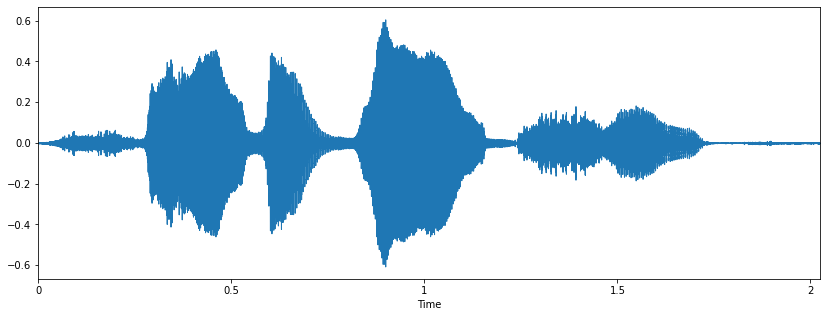

In [23]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][134])
librosa.display.waveplot(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

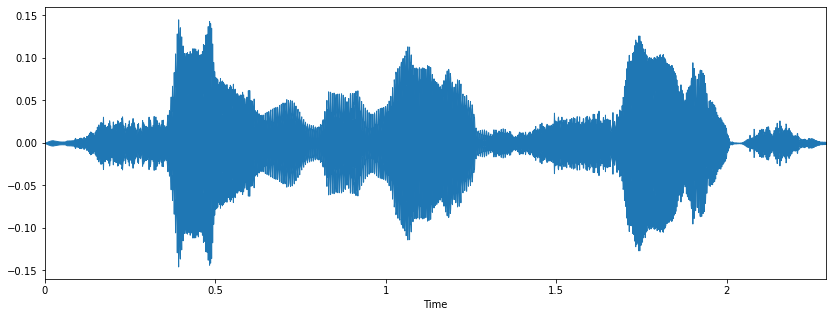

In [24]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][34])
librosa.display.waveplot(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

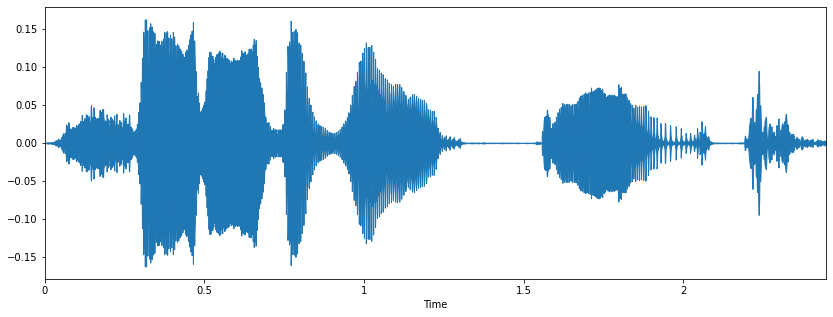

In [25]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])
librosa.display.waveplot(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

#### SPECSHOW

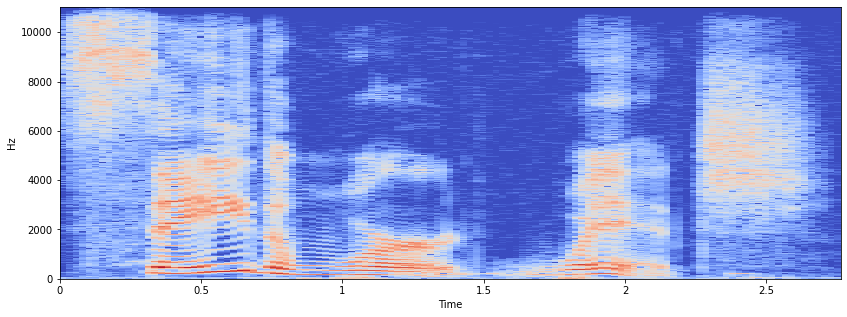

In [26]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][458])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

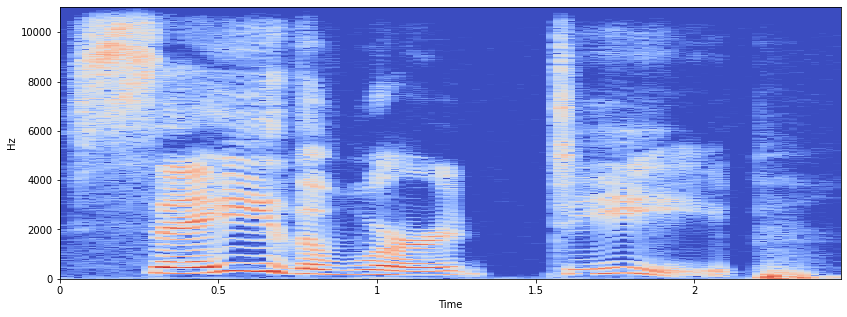

In [27]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

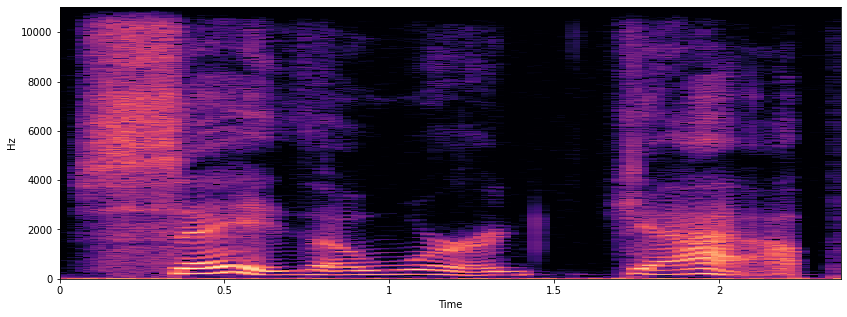

In [28]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

#### NOISE

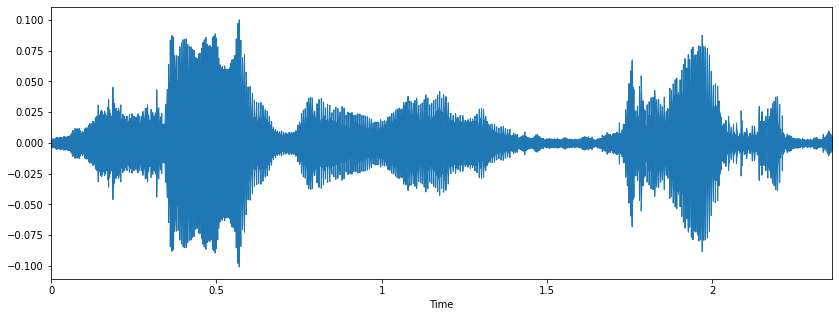

In [29]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

noise_injection = add_noise(audio_speech)

librosa.display.waveplot(noise_injection,sr=sample_rate)
Audio(noise_injection,rate=sample_rate)

#### STRETCHING

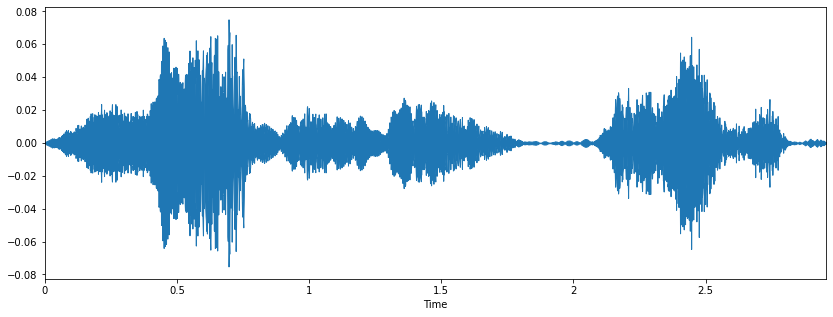

In [30]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stretching_audio = stretch_process(audio_speech)
librosa.display.waveplot(stretching_audio,sr=sample_rate)
Audio(stretching_audio,rate=sample_rate)

#### SHIFTING

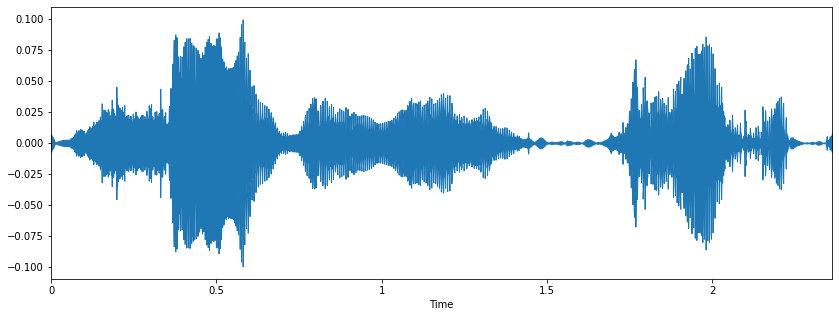

In [31]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

shifting_audio = shift_process(audio_speech)
librosa.display.waveplot(shifting_audio,sr=sample_rate)
Audio(shifting_audio,rate=sample_rate)

#### PITCH

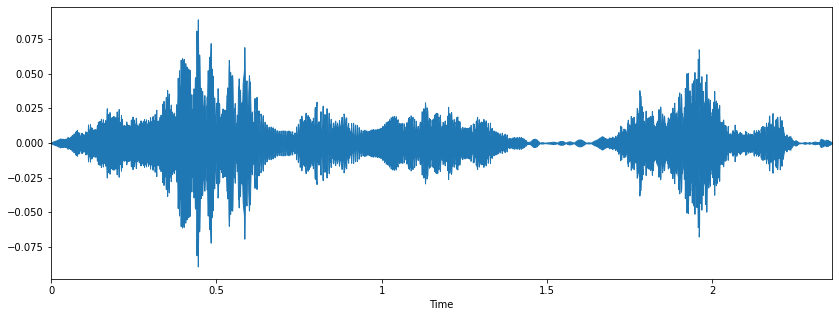

In [32]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

pitch_audio = pitch_process(audio_speech,sample_rate)
librosa.display.waveplot(pitch_audio,sr=sample_rate)
Audio(pitch_audio,rate=sample_rate)

#### SAME TIMEFRAME PERIOD

(43340,)


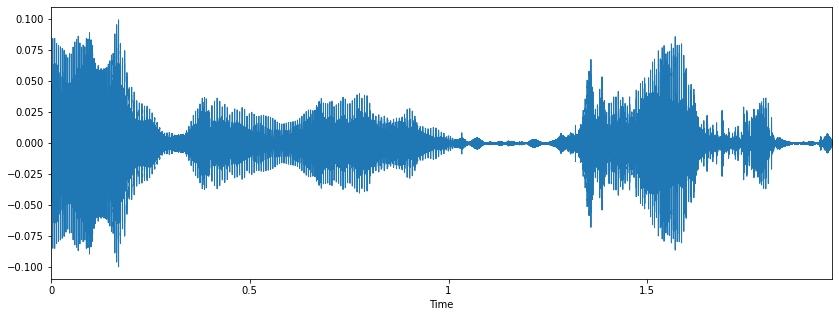

In [33]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000],duration=2.5,offset=0.4)
librosa.display.waveplot(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

(30805,)


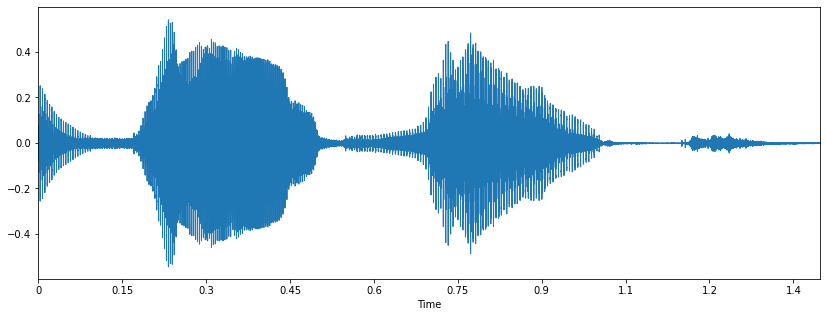

In [34]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][3],duration=2.5,offset=0.6)
librosa.display.waveplot(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

(39023,)


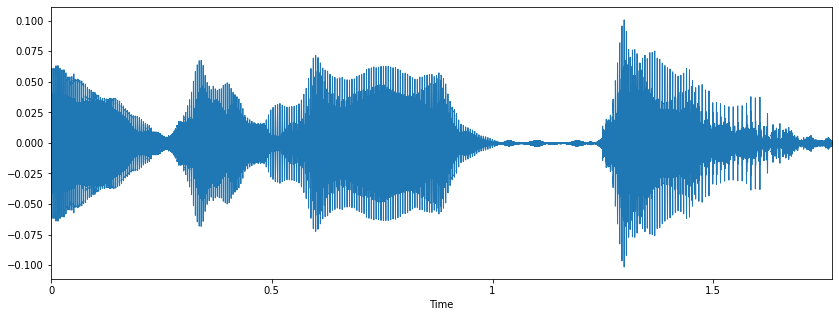

In [35]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][1398],duration=2.5,offset=0.6)
librosa.display.waveplot(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

> # DATA PROCESS AND ENGINEERING

#### TRANSFORMATION AND EXPORTATION

In [36]:
x_Train, y_Train = [],[]

for path,emotion in zip(Main_Wav_Data.WAV,Main_Wav_Data.EMOTION):
    
    features = export_process(path)
    
    for element in features:
        x_Train.append(element)
        y_Train.append(emotion)

In [37]:
print(len(x_Train))
print(len(y_Train))
print(len(Main_Wav_Data.WAV))

8400
8400
2800


In [38]:
print(x_Train[0].shape)

(162,)


In [39]:
print(y_Train[0:5])

['YAF_pleasant_surprised', 'YAF_pleasant_surprised', 'YAF_pleasant_surprised', 'YAF_fear', 'YAF_fear']


In [40]:
New_Features_Wav = pd.DataFrame(x_Train)
New_Features_Wav["EMOTIONS"] = y_Train

New_Features_Wav.to_csv("New_Wav_Set.csv",index=False)

In [41]:
New_Features_Wav.head(-1)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,EMOTIONS
0,0.136540,0.602239,0.663923,0.637146,0.635028,0.636041,0.553482,0.588047,0.610974,0.657723,...,0.000718,0.000634,0.000664,0.000594,0.000457,0.000239,0.000147,0.000051,5.082822e-06,YAF_pleasant_surprised
1,0.233887,0.672575,0.708016,0.682334,0.689286,0.662144,0.591145,0.618244,0.638700,0.697744,...,0.001089,0.000992,0.001075,0.000999,0.000807,0.000615,0.000527,0.000421,3.607100e-04,YAF_pleasant_surprised
2,0.187935,0.587233,0.640135,0.660644,0.628641,0.618592,0.543362,0.567067,0.599904,0.669856,...,0.000263,0.000196,0.000151,0.000193,0.000155,0.000135,0.000053,0.000015,6.691028e-07,YAF_pleasant_surprised
3,0.127289,0.469209,0.404216,0.492033,0.495064,0.541998,0.602614,0.468870,0.487400,0.407897,...,0.000854,0.000749,0.001132,0.001318,0.001593,0.001275,0.000860,0.000321,3.145757e-05,YAF_fear
4,0.153493,0.488836,0.440729,0.551792,0.506796,0.607868,0.580773,0.499979,0.518258,0.427771,...,0.001558,0.001341,0.001809,0.001941,0.002323,0.001837,0.001460,0.000982,6.563642e-04,YAF_fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0.159438,0.481672,0.691840,0.443631,0.358733,0.364906,0.598096,0.873651,0.559647,0.380264,...,0.001028,0.001617,0.002146,0.001462,0.000550,0.001384,0.000898,0.000355,3.352877e-05,YAF_neutral
8395,0.162730,0.483987,0.694997,0.450382,0.365757,0.374168,0.596763,0.872997,0.560951,0.388302,...,0.001027,0.001615,0.002144,0.001462,0.000553,0.001387,0.000900,0.000358,3.560992e-05,YAF_neutral
8396,0.167711,0.343199,0.429801,0.673108,0.416036,0.298460,0.341625,0.563630,0.896487,0.555332,...,0.000171,0.000200,0.000210,0.000368,0.000304,0.000118,0.000101,0.000052,5.989764e-06,YAF_neutral
8397,0.151997,0.371354,0.331488,0.458494,0.437647,0.310317,0.248750,0.267246,0.250799,0.382634,...,0.002130,0.002059,0.001111,0.000967,0.001561,0.005089,0.001482,0.000612,3.846490e-05,YAF_happy


In [42]:
print(New_Features_Wav["EMOTIONS"].value_counts())

YAF_neutral               600
YAF_happy                 600
OAF_neutral               600
YAF_fear                  600
OAF_disgust               600
YAF_pleasant_surprised    600
OAF_Pleasant_surprise     600
OAF_Sad                   600
OAF_Fear                  600
YAF_angry                 600
YAF_sad                   600
YAF_disgust               600
OAF_angry                 600
OAF_happy                 600
Name: EMOTIONS, dtype: int64


#### SPLITTING

In [43]:
encoder_label = OneHotEncoder()

In [44]:
scaler_data = StandardScaler()

In [45]:
X = New_Features_Wav.iloc[:,:-1].values
Y = New_Features_Wav["EMOTIONS"].values

In [46]:
print(X.shape)
print(Y.shape)

(8400, 162)
(8400,)


In [47]:
Y = encoder_label.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [48]:
print(Y.shape)

(8400, 14)


In [49]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,train_size=0.9,random_state=42,shuffle=True)

In [50]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(7560, 162)
(7560, 14)
(840, 162)
(840, 14)


In [51]:
xTrain = scaler_data.fit_transform(xTrain)
xTest = scaler_data.transform(xTest)

In [52]:
print(xTrain.shape)
print(xTest.shape)

(7560, 162)
(840, 162)


In [53]:
xTrain = np.expand_dims(xTrain,axis=2)
xTest = np.expand_dims(xTest,axis=2)

In [54]:
print(xTrain.shape)
print(xTest.shape)

(7560, 162, 1)
(840, 162, 1)


# MODEL STRUCTURE

In [55]:
Model=Sequential()
Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(xTrain.shape[1], 1)))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
Model.add(Dropout(0.2))

Model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Flatten())
Model.add(Dense(units=32, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=14, activation='softmax'))

In [56]:
Model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [57]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [58]:
Conv1D_Model = Model.fit(xTrain, yTrain, batch_size=64, epochs=10, validation_data=(xTest, yTest), callbacks=[early_stop])

Epoch 1/10
119/119 [==============================] - 27s 216ms/step - loss: 2.3153 - accuracy: 0.2026 - val_loss: 1.1343 - val_accuracy: 0.6667
Epoch 2/10
119/119 [==============================] - 25s 209ms/step - loss: 1.1699 - accuracy: 0.6035 - val_loss: 0.4623 - val_accuracy: 0.8655
Epoch 3/10
119/119 [==============================] - 25s 207ms/step - loss: 0.6803 - accuracy: 0.7632 - val_loss: 0.2829 - val_accuracy: 0.9274
Epoch 4/10
119/119 [==============================] - 24s 205ms/step - loss: 0.4669 - accuracy: 0.8439 - val_loss: 0.2887 - val_accuracy: 0.9202
Epoch 5/10
119/119 [==============================] - 25s 208ms/step - loss: 0.4177 - accuracy: 0.8654 - val_loss: 0.1578 - val_accuracy: 0.9464
Epoch 6/10
119/119 [==============================] - 25s 207ms/step - loss: 0.2786 - accuracy: 0.9010 - val_loss: 0.1084 - val_accuracy: 0.9667
Epoch 7/10
119/119 [==============================] - 25s 206ms/step - loss: 0.2235 - accuracy: 0.9212 - val_loss: 0.0971 - val_ac

<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

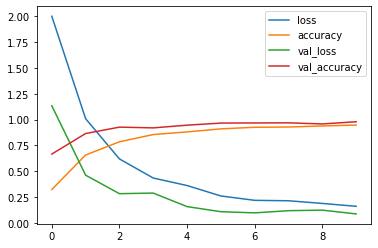

In [59]:
Grap_Data = pd.DataFrame(Conv1D_Model.history)
figure = plt.figure(figsize=(10,10))
Grap_Data.plot()

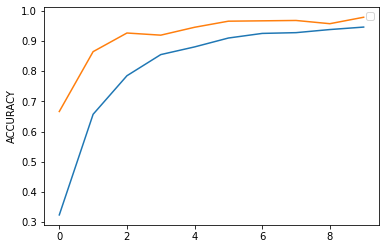

In [60]:
plt.plot(Conv1D_Model.history["accuracy"])
plt.plot(Conv1D_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

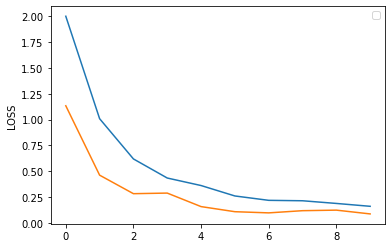

In [61]:
plt.plot(Conv1D_Model.history["loss"])
plt.plot(Conv1D_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

#### PREDICTION

In [62]:
Model_Results = Model.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

27/27 [==============================] - 1s 23ms/step - loss: 0.0870 - accuracy: 0.9798
LOSS:  0.0870
ACCURACY:  0.9798


In [63]:
prediction_test = Model.predict(xTest)
y_prediction = encoder_label.inverse_transform(prediction_test)

yTest = encoder_label.inverse_transform(yTest)

In [64]:
print(prediction_test[0:10])

[[4.41223310e-05 1.29515842e-01 4.48820239e-04 7.36591028e-05
  7.19214464e-03 8.62319410e-01 1.40457501e-04 6.33611918e-08
  1.27259016e-04 7.69731685e-07 8.33804918e-08 1.13377195e-04
  2.60763181e-06 2.14973970e-05]
 [2.54924944e-05 1.62005182e-02 7.62042837e-05 3.50133269e-05
  9.81950641e-01 4.41961834e-04 4.92208928e-05 3.68008841e-07
  1.14060671e-03 5.10045801e-08 5.07555598e-08 3.61434468e-05
  2.75682414e-05 1.61207954e-05]
 [9.98683751e-01 8.17382988e-06 9.23613186e-10 1.14698987e-03
  1.40131760e-07 4.86375200e-07 6.75731189e-06 3.72725708e-08
  9.72995240e-10 1.01026205e-06 5.73132937e-08 1.52400491e-04
  5.66952920e-08 1.78162907e-07]
 [2.96322658e-04 1.74595016e-07 1.75741973e-11 4.35076331e-09
  9.61001888e-07 2.82890710e-07 9.99565184e-01 2.93707766e-12
  2.71526621e-11 3.60596772e-07 5.92392047e-09 1.36618357e-04
  6.91526125e-08 1.49388735e-09]
 [7.15578898e-12 3.11995950e-17 1.61389965e-14 3.10608692e-11
  6.87622575e-15 6.26982483e-19 1.14759970e-07 4.80613758e-13


In [65]:
print(y_prediction[0:10])

[['OAF_happy']
 ['OAF_disgust']
 ['OAF_Fear']
 ['OAF_neutral']
 ['YAF_neutral']
 ['YAF_angry']
 ['YAF_disgust']
 ['OAF_neutral']
 ['YAF_happy']
 ['YAF_neutral']]


In [66]:
print(yTest[0:10])

[['OAF_happy']
 ['OAF_disgust']
 ['OAF_Fear']
 ['OAF_neutral']
 ['YAF_neutral']
 ['YAF_angry']
 ['YAF_disgust']
 ['OAF_neutral']
 ['YAF_happy']
 ['YAF_neutral']]


In [67]:
conf_matrix = confusion_matrix(yTest, y_prediction)

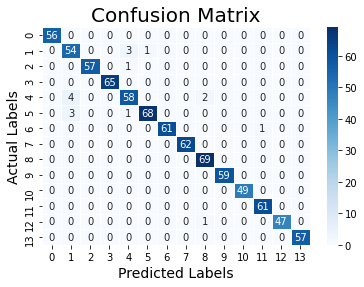

In [68]:
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [69]:
print(classification_report(yTest, y_prediction))

                        precision    recall  f1-score   support

              OAF_Fear       1.00      1.00      1.00        56
 OAF_Pleasant_surprise       0.89      0.93      0.91        58
               OAF_Sad       1.00      0.98      0.99        58
             OAF_angry       1.00      1.00      1.00        65
           OAF_disgust       0.92      0.91      0.91        64
             OAF_happy       0.99      0.94      0.96        72
           OAF_neutral       1.00      0.98      0.99        62
             YAF_angry       1.00      1.00      1.00        62
           YAF_disgust       0.96      1.00      0.98        69
              YAF_fear       1.00      1.00      1.00        59
             YAF_happy       1.00      1.00      1.00        49
           YAF_neutral       0.98      1.00      0.99        61
YAF_pleasant_surprised       1.00      0.98      0.99        48
               YAF_sad       1.00      1.00      1.00        57

              accuracy                

In [70]:
print(accuracy_score(yTest, y_prediction))

0.9797619047619047
